In [22]:
import pandas as pd 
from utils import * 
import matplotlib.pyplot as plt

In [23]:
df_model_sizes = pd.read_csv("../reports/runtimes/v2.csv.zip")
df_model_sizes['runtime'] *= 100
df_model_sizes["optimizer"] = df_model_sizes.apply(
    lambda x: x["optimizer"] + f" {x['schedule']}" * (x["schedule"] != "Fixed"), axis=1
)
dfm = agg_dataframe(df_model_sizes, ['dataset', 'optimizer', 'n_hidden_layers', 'n_hidden_units'])
dfm['optimizer'] = dfm["optimizer"].replace({"SGD Exponential reset": "SGD Exp. Reset"})

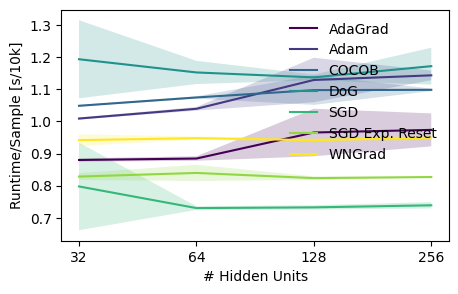

In [29]:
dfp = dfm[dfm["n_hidden_layers"] == 1]
optims = [
    "SGD",  # O(2N)
    "SGD Exp. Reset",  # O(2N)
    "AdaGrad",
    "Adam",  # O(12N)
    "COCOB",  # O(15N)
    # "DAdaptSGD",  # O()
    "WNGrad",  # O(4N)
    "DoG",
]
dfp = dfp[dfp["optimizer"].isin(optims)]
fig, ax = plt.subplots(figsize=(5, 3))
cmapper = ValueColorMapper(values=dfp["optimizer"].unique())
for idx, (optim, dfo) in enumerate(dfp.groupby("optimizer")):
    ys = dfo["runtime_mean"]
    stds =dfo["runtime_std"] 
    line = ax.plot(
        dfo["n_hidden_units"],
        ys,
        color=cmapper(optim),
        label=optim,
    )
    ax.fill_between(
        dfo["n_hidden_units"],
        ys - stds, 
        ys + stds,
        alpha=0.2,
        color=cmapper(optim), 
        edgecolor='none',
    )
ax.set_xscale("log", base=2)
ticks = dfp["n_hidden_units"].unique()
plt.xticks(ticks, labels=ticks)
ax.legend(frameon=False)
ax.set_xlabel("# Hidden Units")
ax.set_ylabel("Runtime/Sample [s/10k]")
plt.savefig("../pub/figures/runtimes_1hidden.pdf")

Text(0, 0.5, 'Runtime/Sample [s/10k]')

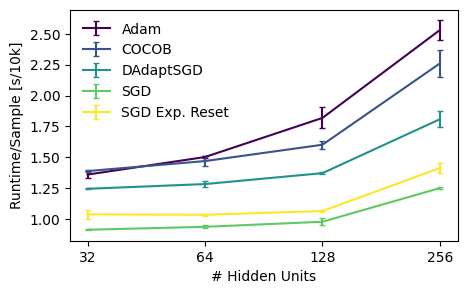

In [25]:
dfp = dfm[dfm["n_hidden_layers"] == 3]
optims = [
    "SGD",
    "SGD Exp. Reset",
    "Adam",
    "COCOB",
    "DAdaptSGD",
    # "WNGrad",
]
dfp = dfp[dfp["optimizer"].isin(optims)]
fig, ax = plt.subplots(figsize=(5, 3))
cmapper = ValueColorMapper(values=dfp["optimizer"].unique())
for idx, (optim, dfo) in enumerate(dfp.groupby("optimizer")):
    line = ax.errorbar(
        dfo["n_hidden_units"],
        dfo["runtime_mean"],
        yerr=dfo["runtime_std"],
        capsize=2,
        color=cmapper(optim),
        label=optim,
    )
ax.set_xscale("log", base=2)
ticks = dfp["n_hidden_units"].unique()
plt.xticks(ticks, labels=ticks)
ax.legend(frameon=False)
ax.set_xlabel("# Hidden Units")
ax.set_ylabel("Runtime/Sample [s/10k]")
# plt.savefig("../pub/figures/runtimes_3hidden.pdf")

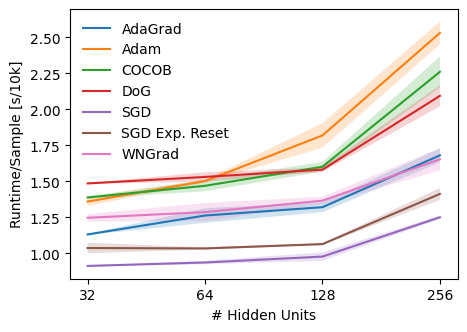

In [32]:
dfp = dfm[dfm["n_hidden_layers"] == 3]
optims = [
    "SGD",  # O(2N)
    "SGD Exp. Reset",  # O(2N)
    "AdaGrad",
    "Adam",  # O(12N)
    "COCOB",  # O(15N)
    # "DAdaptSGD",  # O()
    "WNGrad",  # O(4N)
    "DoG",
]
dfp = dfp[dfp["optimizer"].isin(optims)]
fig, ax = plt.subplots(figsize=(5, 3.5))
cmapper = ValueColorMapper(values=dfp["optimizer"].unique())
for idx, (optim, dfo) in enumerate(dfp.groupby("optimizer")):
    ys = dfo["runtime_mean"]
    stds = dfo["runtime_std"]
    line = ax.plot(
        dfo["n_hidden_units"],
        ys,
        # color=cmapper(optim),
        label=optim,
    )
    ax.fill_between(
        dfo["n_hidden_units"],
        ys - stds,
        ys + stds,
        alpha=0.2,
        # color=cmapper(optim),
        edgecolor="none",
    )
ax.set_xscale("log", base=2)
ticks = dfp["n_hidden_units"].unique()
plt.xticks(ticks, labels=ticks)
ax.legend(frameon=False)
ax.set_xlabel("# Hidden Units")
ax.set_ylabel("Runtime/Sample [s/10k]")
plt.savefig("../pub/figures/runtimes_3hidden.pdf")